<a href="https://colab.research.google.com/github/clionelove123/Machine_Learning/blob/main/ML_Chap_12_Tree_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting
from sklearn.datasets import load_breast_cancer # 유방암데이터
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상
# plt.rcParams["font.family"] = 'NanumBarunGothic' # 한글폰트 전역 설정

In [14]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
data = load_breast_cancer()
print("Data dimension:", data.data.shape)
X_tr, X_te, y_tr, y_te = train_test_split(data.data, data.target, test_size=0.3, random_state=0)
print("Train Data:", X_tr.shape, "Test Data:", X_te.shape)

Data dimension: (569, 30)
Train Data: (398, 30) Test Data: (171, 30)


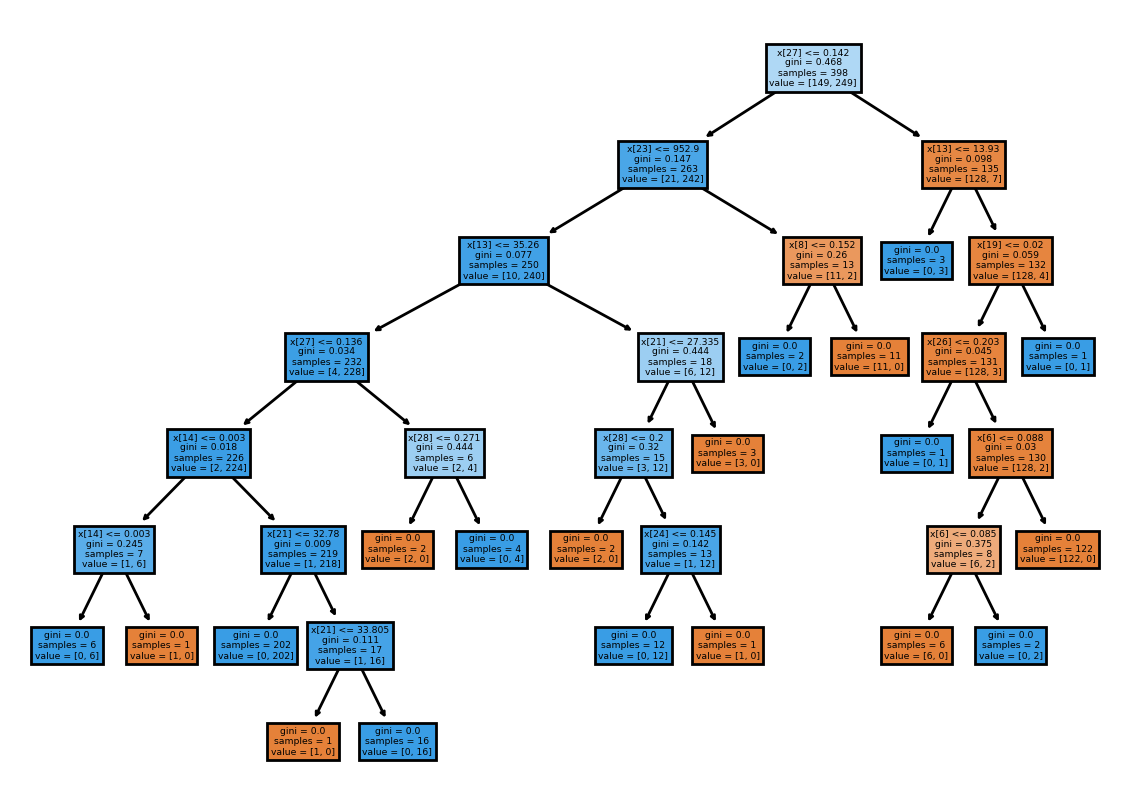

In [16]:
clf = DT(random_state=0)
clf = clf.fit(X_tr, y_tr)
plt.figure(figsize=(7,5), dpi=200)
plot_tree(clf, filled=True)

plt.show()

[0.         0.00249033 0.00463858 0.00487285 0.00489632 0.00742172
 0.0080402  0.00838676 0.00850406 0.01386055 0.04035621 0.33798172] [0.         0.00996131 0.01459989 0.03409128 0.04388392 0.05130564
 0.05934584 0.0677326  0.07623666 0.09009721 0.13045342 0.46843514]


Text(0.5, 1.0, 'ccp alpha vs total impurity for training set')

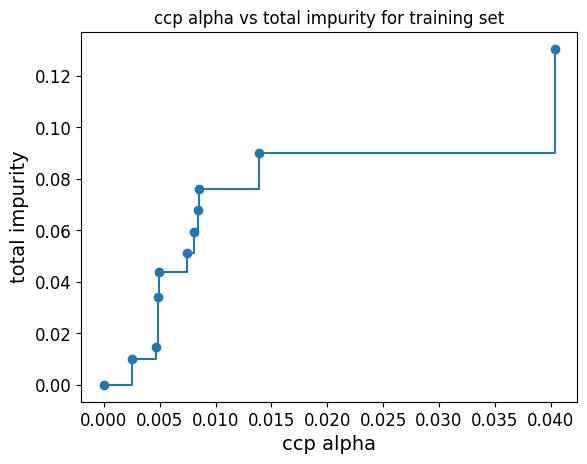

In [17]:
path = clf.cost_complexity_pruning_path(X_tr, y_tr)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("ccp alpha")
ax.set_ylabel("total impurity")
ax.set_title("ccp alpha vs total impurity for training set")

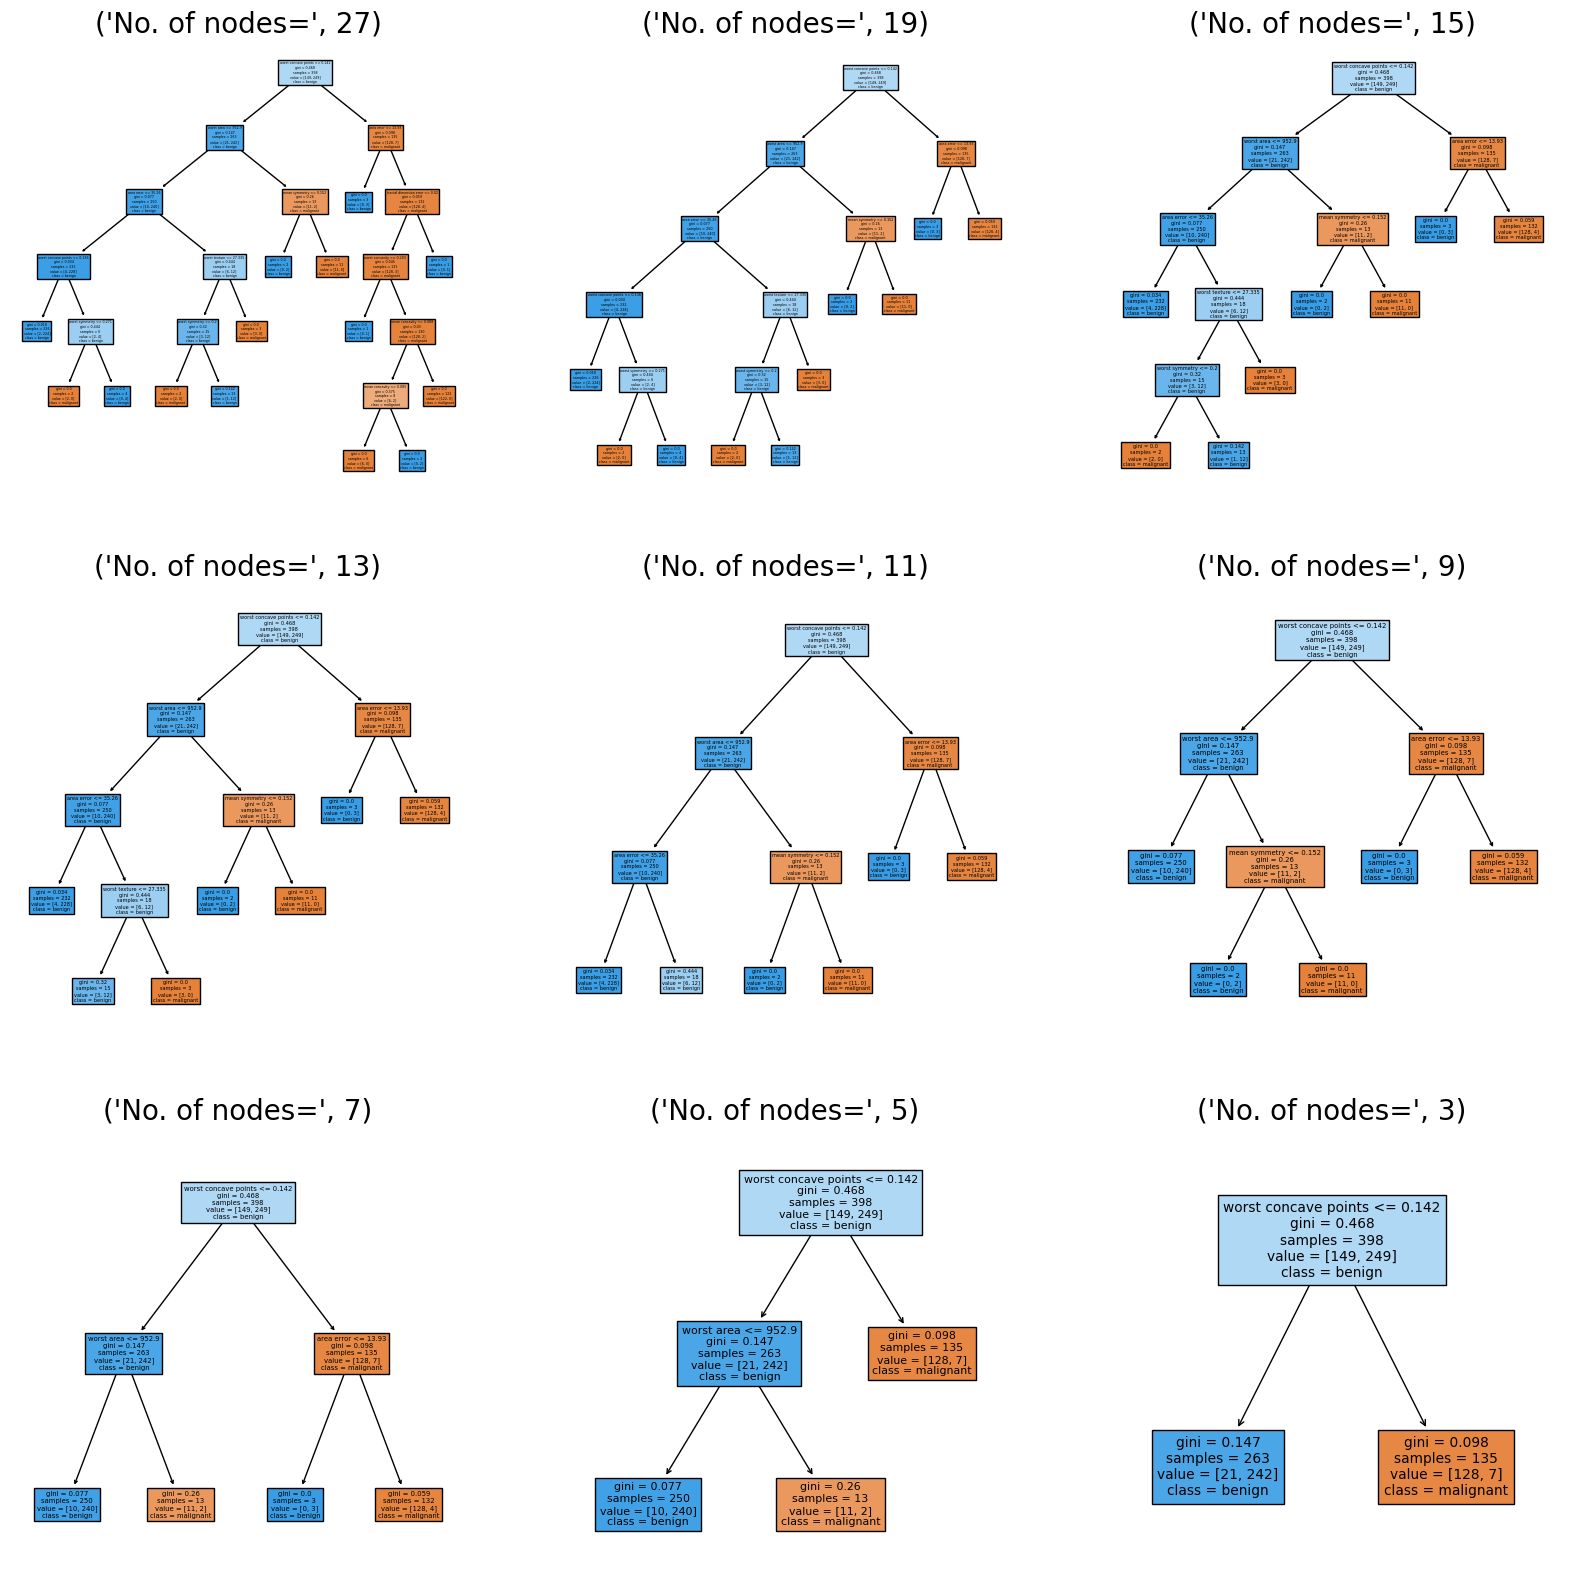

In [18]:
clfs = []
for ccp_alpha in ccp_alphas[:-1]:
    clf_ = DT(random_state=0, ccp_alpha=ccp_alpha)
    clf_.fit(X_tr, y_tr)
    clfs.append(clf_)

# numbers of nodes for each tree model
t_nodes = [clf.tree_.node_count for clf in clfs]

import numpy as np
fig, ax = plt.subplots(3,3, figsize=(20, 20))
k = 0
for tree_m in clfs[2:]:
    i = k//3
    j = k%3
    plot_tree(tree_m, feature_names = data.feature_names,
         class_names=data.target_names, filled=True, ax=ax[i,j])
    ax[i,j].set_title(("No. of nodes=", tree_m.tree_.node_count), fontsize=20)
    k += 1
plt.show()

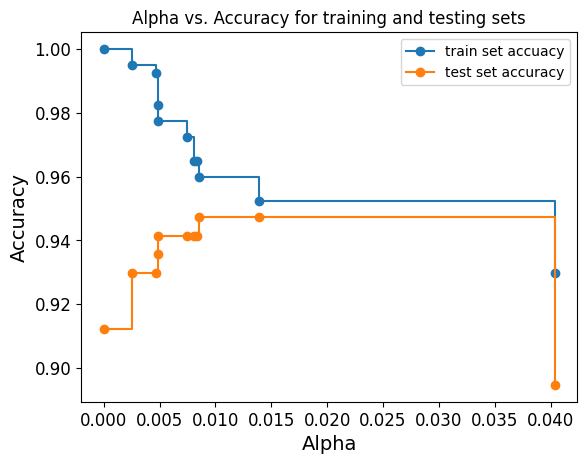

In [19]:
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas[:-1]:
    clf0 = DT(random_state=0, ccp_alpha=ccp_alpha)
    clf0.fit(X_tr, y_tr) # 모형적합
    train_scores.append(clf0.score(X_tr, y_tr)) #
    test_scores.append(clf0.score(X_te, y_te))

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Alpha vs. Accuracy for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker="o", label="train set accuacy", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores, marker="o", label="test set accuracy", drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
df = pd.DataFrame({"test acc": test_scores, "alpha":ccp_alphas[:-1]})
print(df)
# 정분류율이 가장 작은 모형 선택
max_idx = df["test acc"].idxmax()
print("optimal tree index",max_idx, "optimal alpha", ccp_alphas[max_idx]) #

    test acc     alpha
0   0.912281  0.000000
1   0.929825  0.002490
2   0.929825  0.004639
3   0.935673  0.004873
4   0.941520  0.004896
5   0.941520  0.007422
6   0.941520  0.008040
7   0.941520  0.008387
8   0.947368  0.008504
9   0.947368  0.013861
10  0.894737  0.040356
optimal tree index 8 optimal alpha 0.008504058755315036


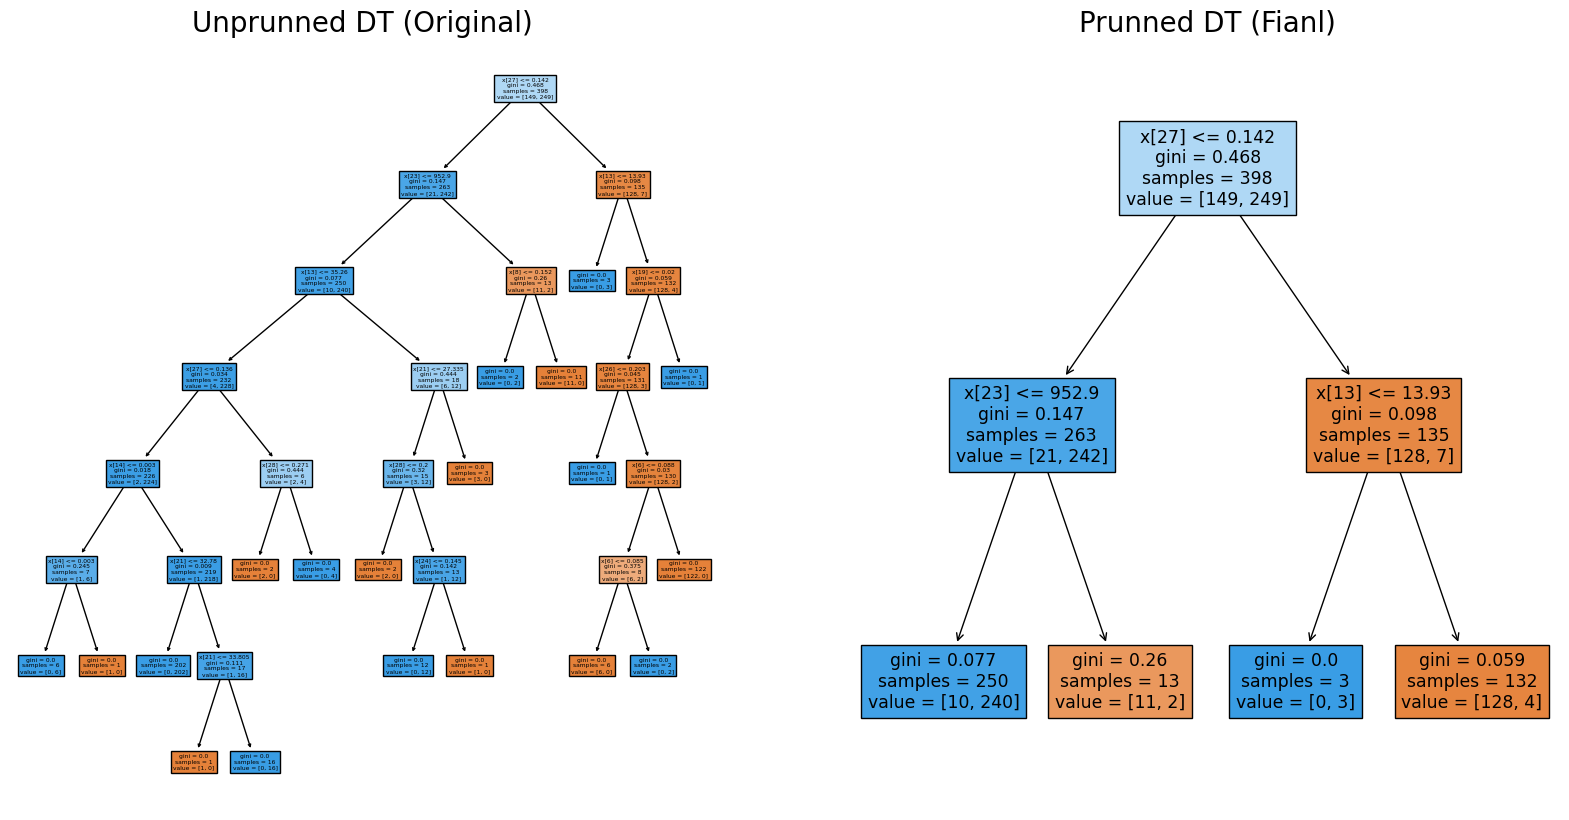

In [21]:
# 최종모형 선택
clf_p = clfs[max_idx]
# 모형비교
fig, ax = plt.subplots(1,2, figsize=(20, 10))  # whatever size you want
plot_tree(clf, filled=True, ax=ax[0])
plot_tree(clf_p, filled=True, ax=ax[1])
ax[0].set_title('Unprunned DT (Original)', fontsize=20)
ax[1].set_title('Prunned DT (Fianl)', fontsize=20)
plt.show()